# Feedforward Neural Network Implementation with Keras and TensorFlow: MNIST Dataset
This Jupyter notebook demonstrates the implementation of a feedforward neural network using Keras and TensorFlow. The goal of this assignment is to walk through the process of building, training, and evaluating a neural network for image classification. We will use the MNIST or CIFAR-10 dataset as per your choice.<br>
Dataset: https://www.tensorflow.org/datasets/catalog/mnist

## Assignment Steps:

**a. Import the necessary packages**: We will start by importing the required Python libraries, including Keras, TensorFlow, and other essential packages.

**b. Load the training and testing data**: In this step, we will load the dataset (either MNIST or CIFAR-10) for training and testing the neural network.

**c. Define the network architecture using Keras**: Here, we will define the architecture of our feedforward neural network, specifying the number of layers, neurons, and activation functions.

**d. Train the model using SGD (Stochastic Gradient Descent)**: We will use the Stochastic Gradient Descent optimizer to train the neural network on the training data.

**e. Evaluate the network**: After training, we will evaluate the performance of the model on the testing data to assess its accuracy and other relevant metrics.

**f. Plot the training loss and accuracy**: We will create plots to visualize the training loss and accuracy over epochs, providing insights into the model's learning progress.

Feel free to follow along with the code and explanations provided in this notebook to gain a better understanding of building and training neural networks for image classification.

# Build the Image classification model by dividing the model into following 4 stages:
a. Loading and preprocessing the image data<br>
b. Defining the model’s architecture<br>
c. Training the model<br>
d. Estimating the model’s performance<br>

Note: Both assignment can use this code accordingly

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

Loading MNIST data from keras .dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
#shape of numpy arrays
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")
# x_train( 60k images of 28*28 dimention) Pixel values range from 0 to 255.
# y_train: digit labels (integers in range 0-9)

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test  (10000, 28, 28)
Shape of y_test  (10000,)


Image Dimention -> 28 X 28 <br>
Grayscale image -> 1 channel

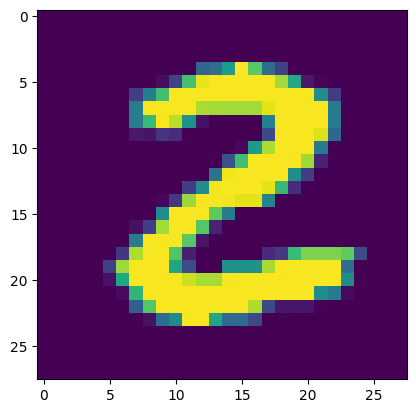

2


In [ ]:
#displaying the image
plt.imshow(x_train[25])
plt.show()

#printing corresponding label
print(y_train[25])

Image Labels

In [ ]:
#unique values in Y_rain
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have the same dimension in this dataset, if not then convert it into same dimention to provide it to neural network

In [ ]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
# print(x_train[10])
# plt.imshow(x_train[10])

#Bulding Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

In [ ]:
model.compile(optimizer="sgd",loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#train neural network

In [ ]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.7392 - accuracy: 0.7928 - val_loss: 0.3252 - val_accuracy: 0.9048
Epoch 2/10
2000/2000 [==============================] - 10s 5ms/step - loss: 0.3075 - accuracy: 0.9097 - val_loss: 0.2649 - val_accuracy: 0.9241
Epoch 3/10
2000/2000 [==============================] - 11s 5ms/step - loss: 0.2561 - accuracy: 0.9255 - val_loss: 0.2308 - val_accuracy: 0.9339
Epoch 4/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.2236 - accuracy: 0.9355 - val_loss: 0.2017 - val_accuracy: 0.9427
Epoch 5/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2004 - accuracy: 0.9430 - val_loss: 0.1863 - val_accuracy: 0.9473
Epoch 6/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1827 - accuracy: 0.9470 - val_loss: 0.1755 - val_accuracy: 0.9496
Epoch 7/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1688 - accuracy: 0.9509 - val_loss: 0.1650 - val_accura

<Axes: >

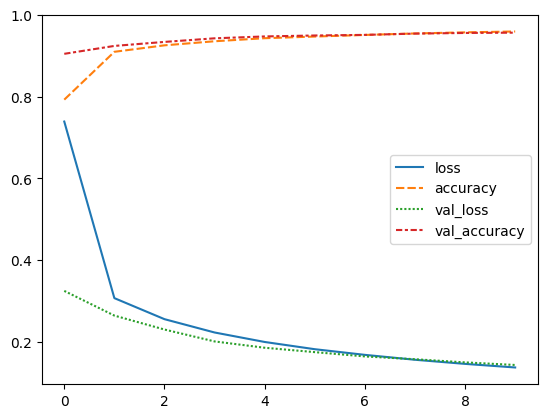

In [ ]:
import seaborn as sns
sns.lineplot(model.history.history)

### Alternative Plot below for more details

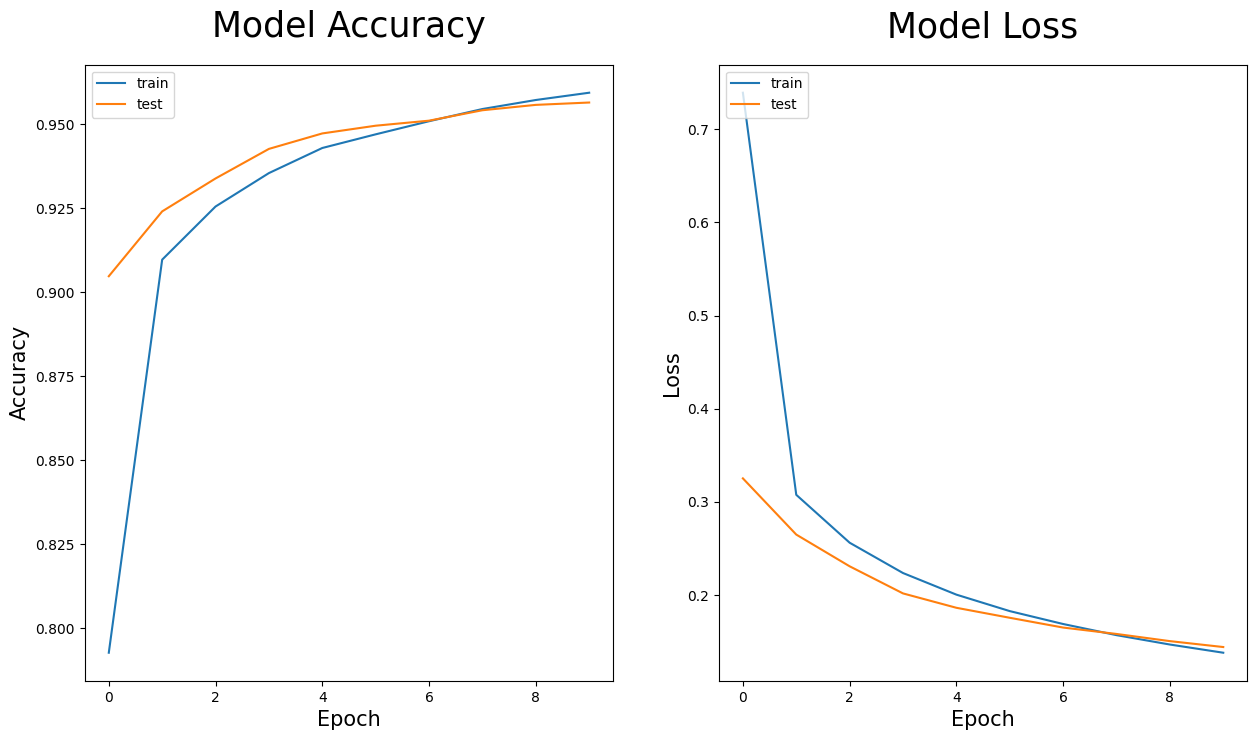

In [ ]:
# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[15,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluation

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1441 - accuracy: 0.9565


313/313 [==============================] - 1s 2ms/step


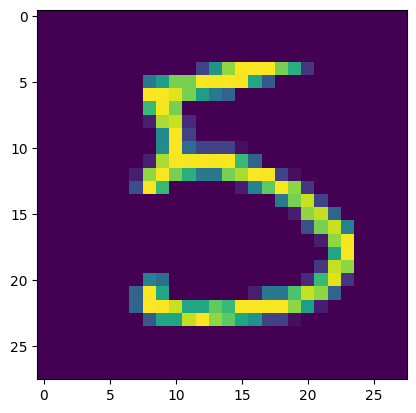

5


In [ ]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))